# Load Cleansed Wine Reviews

See [data preparation](wine_review-data_preparation.ipynb) for details on the prepared dataset.

Libraries

In [33]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [34]:
wine_df = pd.read_parquet('wine_review.parquet.gzip')
wine_df.info()
wine_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 100538 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   country         100538 non-null  object 
 1   description     100538 non-null  object 
 2   points          100538 non-null  int64  
 3   price           93522 non-null   float64
 4   taster_name     100538 non-null  object 
 5   title           100538 non-null  object 
 6   variety         100538 non-null  object 
 7   winery          100538 non-null  object 
 8   year            100538 non-null  int64  
 9   type            100538 non-null  object 
 10  quality         100538 non-null  object 
 11  classification  100538 non-null  object 
 12  location        100538 non-null  object 
 13  band            93522 non-null   object 
dtypes: float64(1), int64(2), object(11)
memory usage: 11.5+ MB


,country,description,points,price,taster_name,title,variety,winery,year,type,quality,classification,location,band
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,Kerin O’Keefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,2013,white,medium,Old World,Etna,None
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2011,red,medium,Old World,Douro,popular
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2013,white,medium,New World,Oregon,popular
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2013,white,medium,New World,Michigan,popular
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2012,red,medium,New World,Oregon,luxury


In [35]:
wine_df.nunique()

country               15
description       100517
points                21
price                370
taster_name           20
title             100101
variety               50
winery             14982
year                  18
type                   3
quality                2
classification         2
location             569
band                   8
dtype: int64

# Exploratory Data Analysis

## Univariate Analysis

### Points

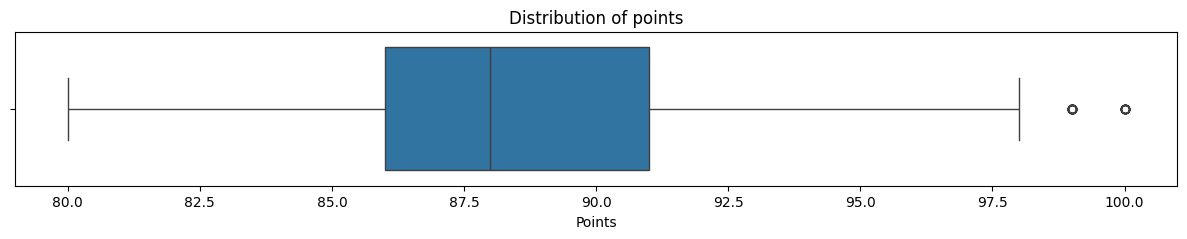

In [36]:
# box plot of points
fig, ax = plt.subplots(figsize=(15, 2))
ax = sns.boxplot(wine_df, x='points', orient='h')
ax.set_title('Distribution of points')
ax.set_xlabel('Points')
plt.show()

### Quality

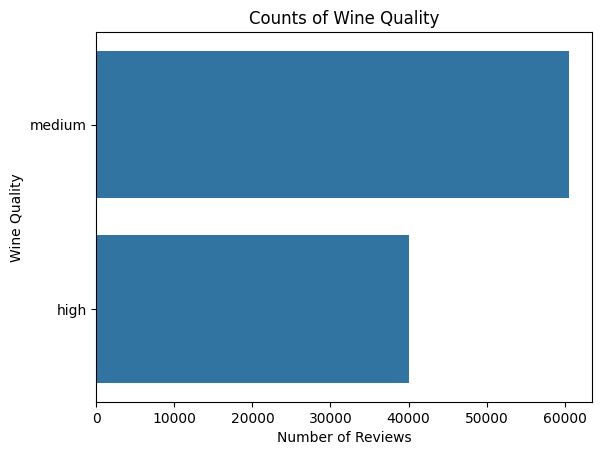

In [37]:
sns.barplot(wine_df.quality.value_counts().sort_values(ascending=False).reset_index(), x='count', y='quality')
plt.title('Counts of Wine Quality')
plt.xlabel('Number of Reviews')
plt.ylabel('Wine Quality')
plt.show()

### Price

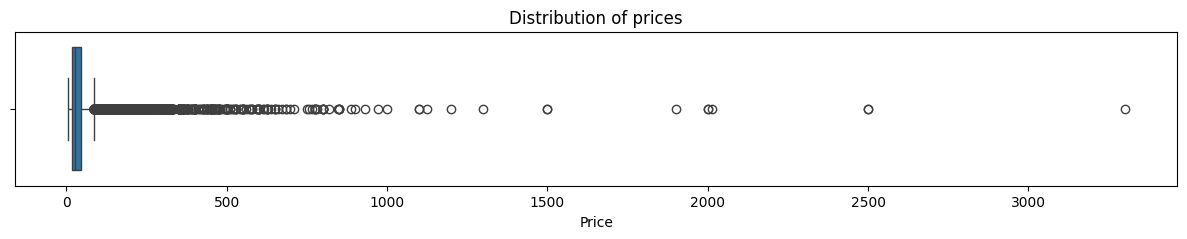

In [38]:
# box plot of price
fig, ax = plt.subplots(figsize=(15, 2))
ax = sns.boxplot(wine_df, x='price', orient='h')
ax.set_title('Distribution of prices')
ax.set_xlabel('Price')
plt.show()

### Price Band

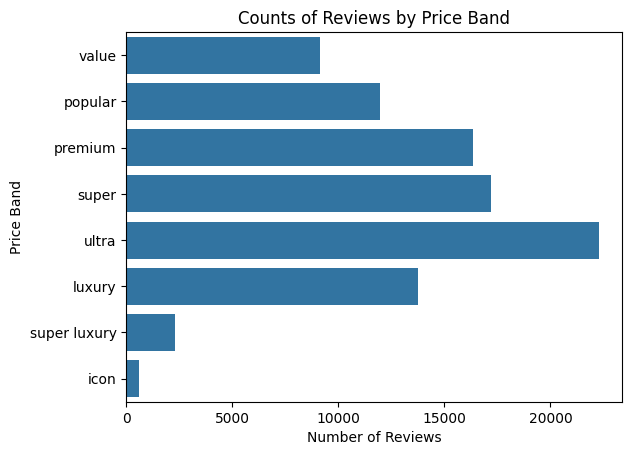

In [39]:
sns.barplot(wine_df['band'].value_counts(), orient='h', order=['value', 'popular', 'premium', 'super', 'ultra', 'luxury', 'super luxury', 'icon'])
plt.title('Counts of Reviews by Price Band')
plt.xlabel('Number of Reviews')
plt.ylabel('Price Band')
plt.show()

### Year

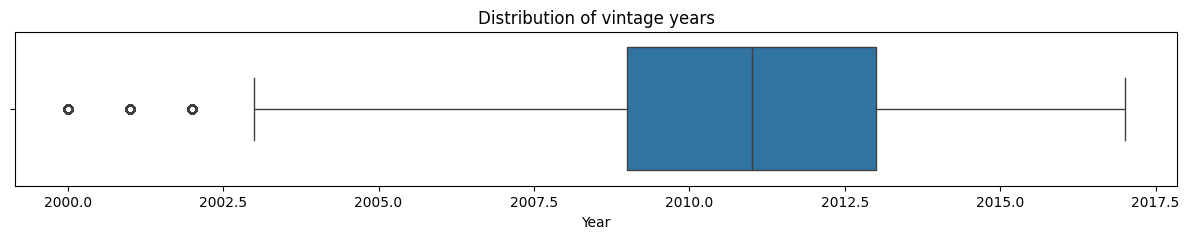

In [40]:
fig, ax = plt.subplots(figsize=(15, 2))
ax = sns.boxplot(wine_df, x='year', orient='h')
ax.set_title('Distribution of vintage years')
ax.set_xlabel('Year')
plt.show()

In [41]:
wine_df.year.describe()

count    100538.000000
mean       2010.756162
std           3.264153
min        2000.000000
25%        2009.000000
50%        2011.000000
75%        2013.000000
max        2017.000000
Name: year, dtype: float64

### Variety

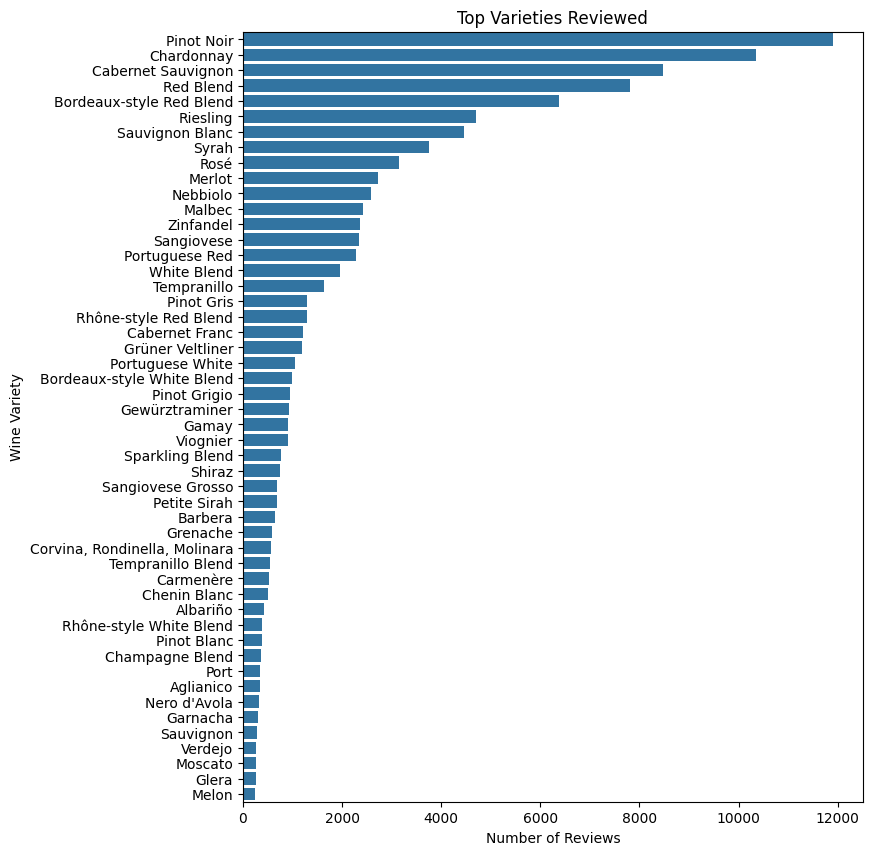

In [42]:
fig, ax = plt.subplots(figsize=(8, 10))
sns.barplot(wine_df.variety.value_counts().sort_values(ascending=False).reset_index(), x='count', y='variety')
ax.set_title('Top Varieties Reviewed')
ax.set_xlabel('Number of Reviews')
ax.set_ylabel('Wine Variety')
plt.show()

### Type

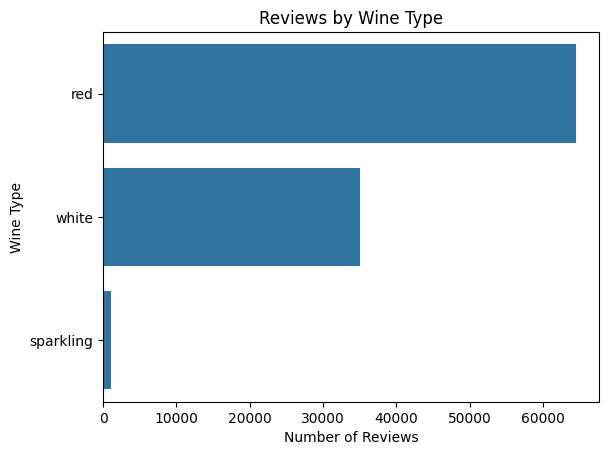

In [43]:
# fig, ax = plt.subplots(figsize=(8, 10))
sns.barplot(wine_df.type.value_counts().sort_values(ascending=False).reset_index(), x='count', y='type')
plt.title('Reviews by Wine Type')
plt.xlabel('Number of Reviews')
plt.ylabel('Wine Type')
plt.show()

### Country

In [44]:
reviews_by_country = wine_df.country.value_counts().reset_index().sort_values('count', ascending=False)
reviews_by_country

,country,count
0,US,45840
1,France,17692
2,Italy,13115
3,Spain,4226
4,Portugal,4033
5,Chile,3785
6,Argentina,2988
7,Austria,2183
8,Australia,1828
9,Germany,1789


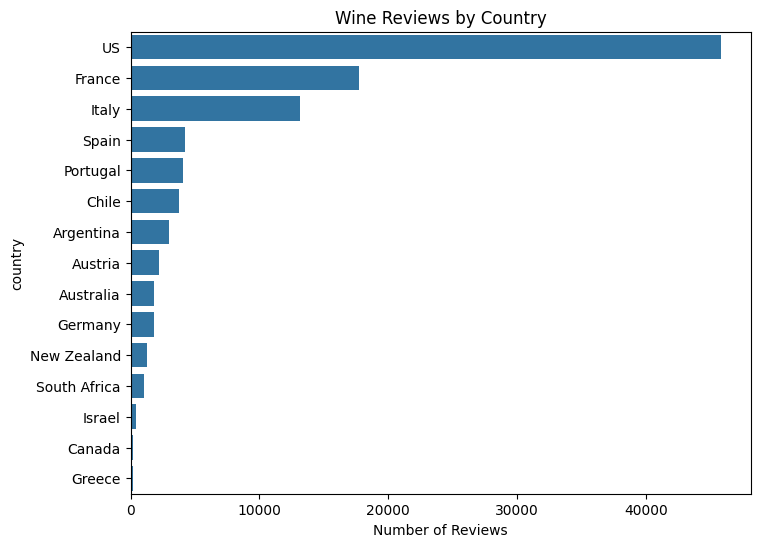

In [45]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(reviews_by_country, x='count', y='country')
ax.set_title('Wine Reviews by Country')
ax.set_xlabel('Number of Reviews')
plt.show()

In [46]:
fig = px.choropleth(
  reviews_by_country, locations='country', locationmode='country names', 
  color='count', range_color=[reviews_by_country['count'].min(), reviews_by_country['count'].max()],
  title='Number of wine reviews by country'
)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

### Old world vs New World Wine Classification

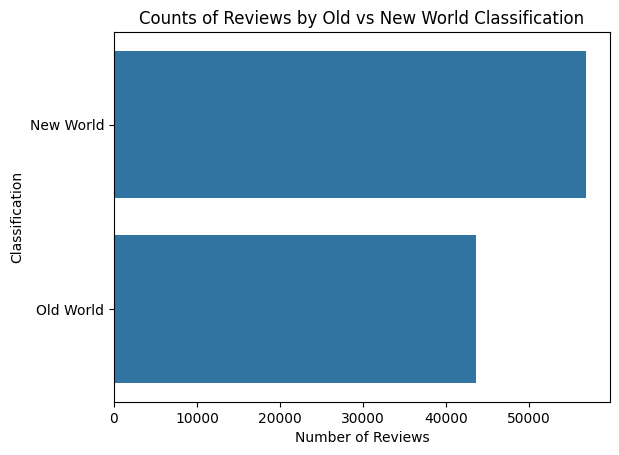

In [47]:
sns.barplot(wine_df.classification.value_counts(), orient='h')
plt.title('Counts of Reviews by Old vs New World Classification')
plt.xlabel('Number of Reviews')
plt.ylabel('Classification')
plt.show()

### Taster

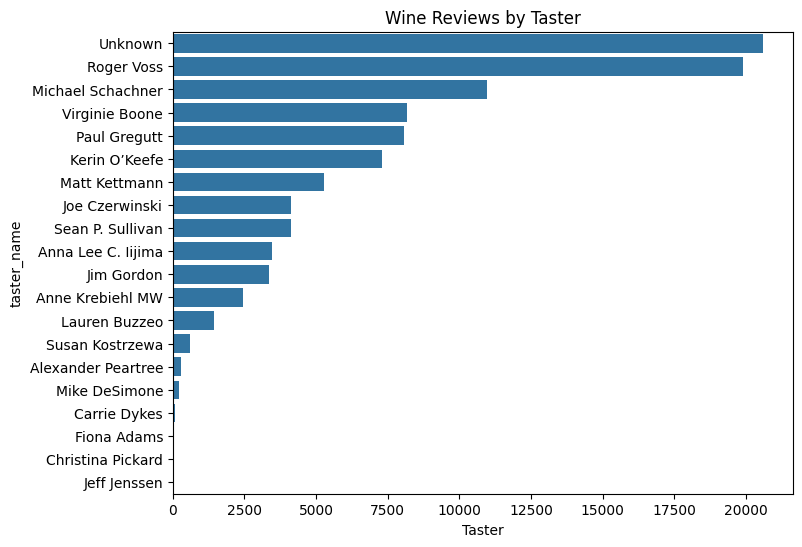

In [48]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(wine_df.taster_name.value_counts().sort_values(ascending=False).reset_index(), x='count', y='taster_name')
ax.set_title('Wine Reviews by Taster')
ax.set_xlabel('Number of Reviews')
ax.set_xlabel('Taster')
plt.show()

## Multivariate Analysis

### Price-Point relationship

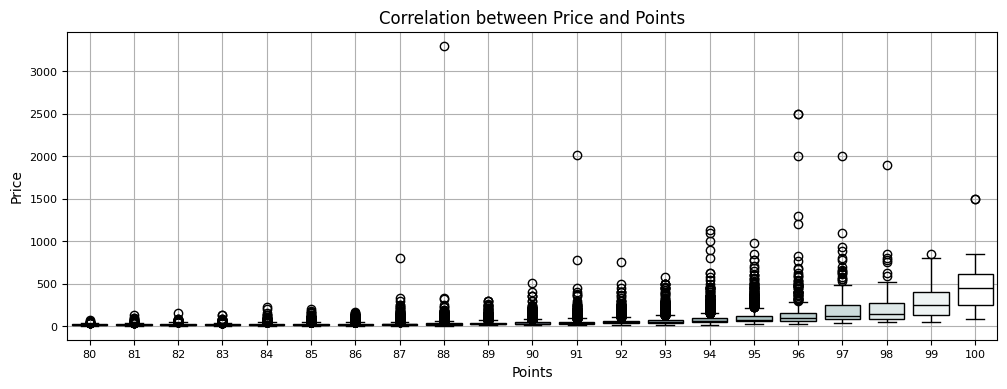

In [49]:
plt.figure(figsize=(12,4))
sns.boxplot(x = 'points', y = 'price', palette = 'bone', hue='points', data = wine_df, native_scale=False, legend=None)
plt.title("Correlation between Price and Points", fontsize=12)
plt.xlabel("Points",fontsize=10)
plt.ylabel("Price",fontsize=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.grid()
plt.show()

In [50]:
wine_corr = wine_df.select_dtypes(np.number).corr()
wine_corr

,points,price,year
points,1.000000,0.415175,0.056715
price,0.415175,1.000000,-0.073364
year,0.056715,-0.073364,1.000000


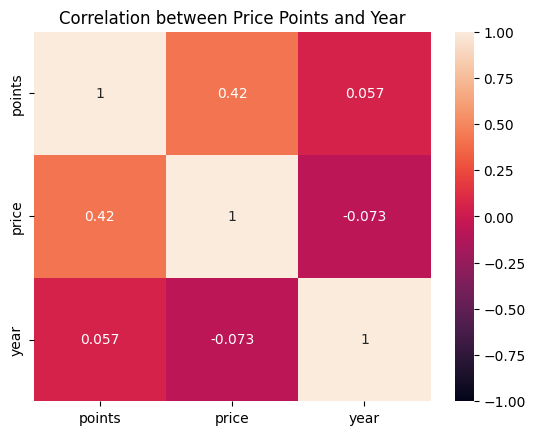

In [51]:
sns.heatmap(wine_corr, annot=True, vmin=-1.0, vmax=1.0)
plt.title("Correlation between Price Points and Year", fontsize=12)
plt.show()

There is a clear relationship between the points a wine gets, and the expected price for the wine. However the age of win appears to be weekly correlated to points or price.

### Taster-Point relationship

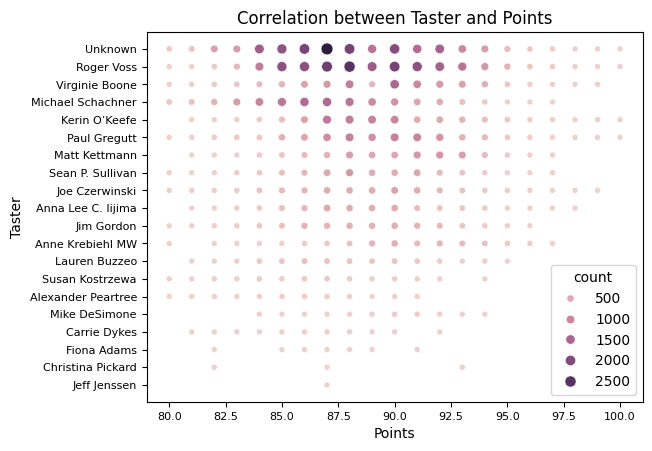

In [52]:
sns.scatterplot(wine_df.groupby(['taster_name', 'points'])[['title']].count().reset_index().rename(columns={'title': 'count'}).sort_values('count', ascending=False), x='points', y='taster_name', size='count', hue='count')
plt.title("Correlation between Taster and Points", fontsize=12)
plt.xlabel("Points",fontsize=10)
plt.ylabel("Taster",fontsize=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

Most wines reviewed are mid-range between 85 and 90 points as expected. Most reviewers span broad range of points. Does not appear to be bias from reviewer.

### Country-Price-Point relationship

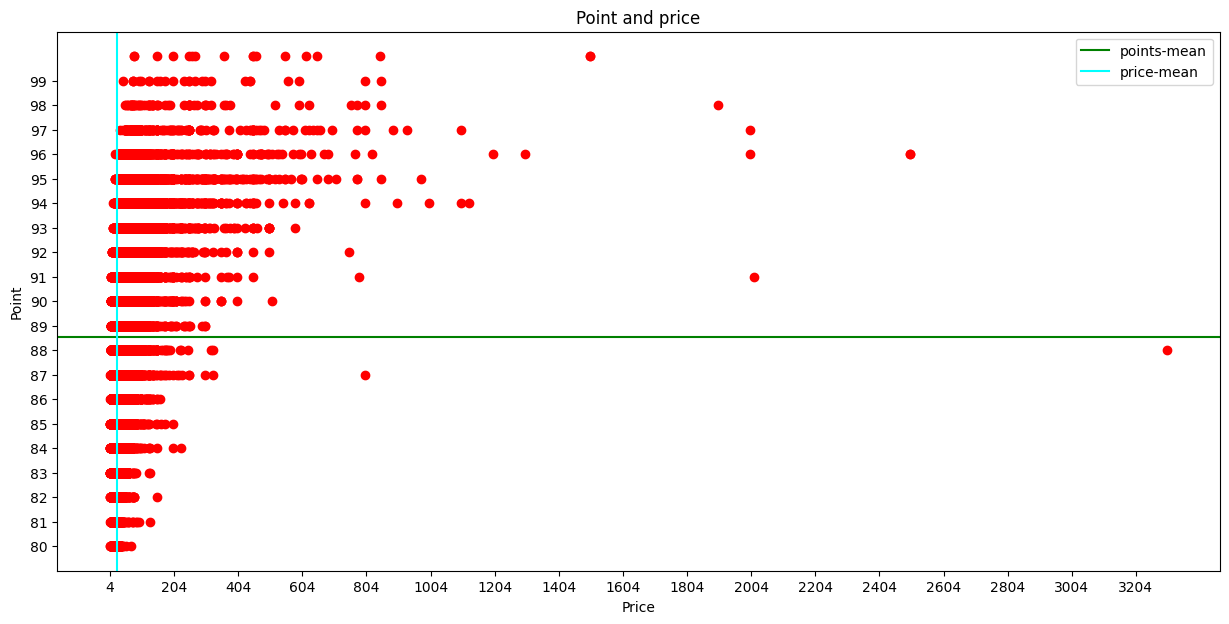

In [53]:
# get points and price columns
points_and_price = wine_df[['points', 'price']]

# mean of points and price
points_mean = points_and_price['points'].mean()
price_mean = points_and_price['price'].median()

# min and max of points
points_min = points_and_price['points'].min()
points_max = points_and_price['points'].max()

# min and max of price
price_min = points_and_price['price'].min()
price_max = points_and_price['price'].max()

# plot scatter chart on points & price
fig, ax = plt.subplots(figsize=(15,7))
ax.scatter(points_and_price['price'], points_and_price['points'], color='red')
ax.set_title('Point and price')
ax.set_xlabel('Price')
ax.set_ylabel('Point')
ax.set_xticks(np.arange(price_min, price_max, 200.0))
ax.set_yticks(np.arange(points_min, points_max, 1))
points_mean_line = ax.axhline(points_mean, color='green')
price_mean_line = ax.axvline(price_mean, color='cyan')
ax.legend([points_mean_line, price_mean_line],
          ['points-mean', 'price-mean'])
plt.show()

In [54]:
by_country_stats = wine_df.groupby('country')[['price', 'points']].mean().sort_index()
by_country_stats['count'] = wine_df.country.value_counts().sort_index().values
by_country_stats

,price,points,count
country,,,
Argentina,25.246274,86.745315,2988
Australia,35.851359,88.595186,1828
Austria,31.823690,90.373339,2183
Canada,33.643243,89.333333,186
Chile,20.604975,86.459181,3785
France,42.106180,88.883563,17692
Germany,43.848260,90.012856,1789
Greece,24.345029,87.080000,175
Israel,31.764858,88.493703,397


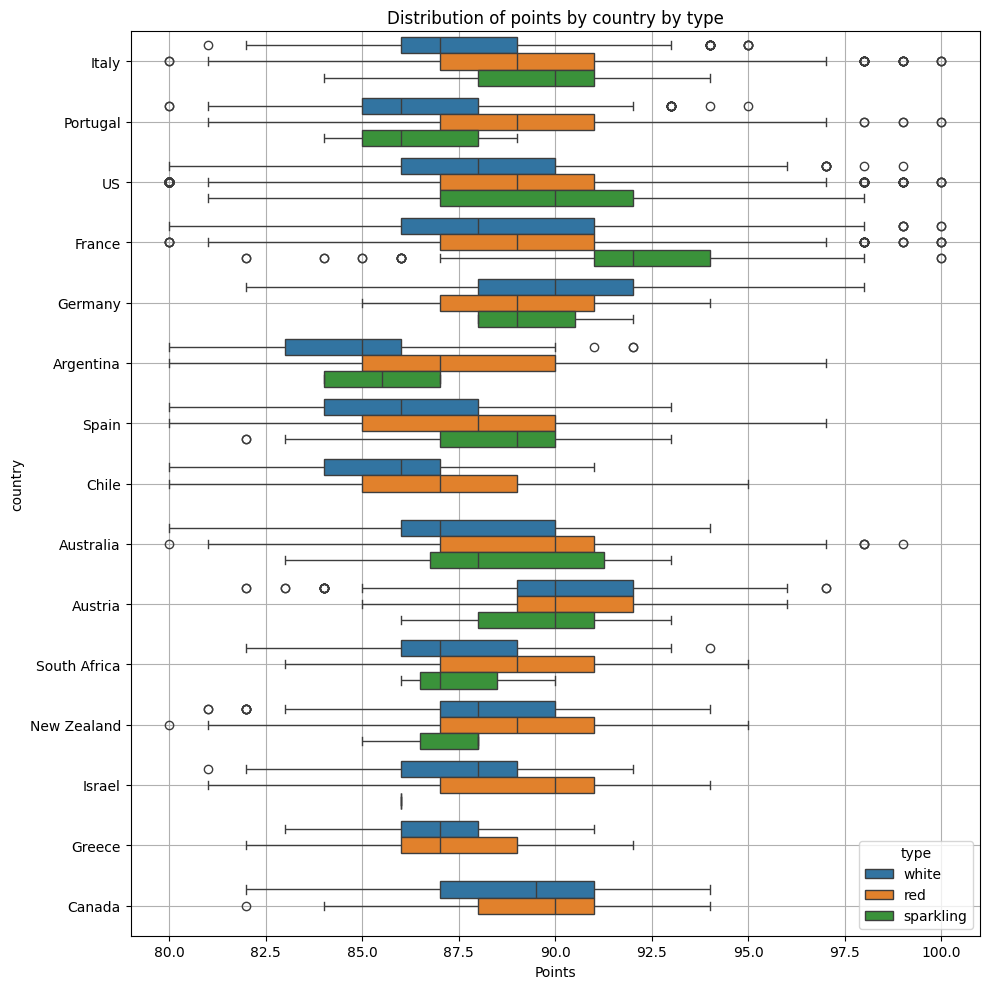

In [55]:
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.boxplot(wine_df, x='points', y='country', orient='h', native_scale=True, hue='type')
ax.set_title('Distribution of points by country by type')
ax.set_xlabel('Points')
plt.grid()
plt.tight_layout()
plt.show()

In [56]:
# plt.figure(figsize=(14,6))
# sns.countplot(wine_df['points'])
# plt.title('Points',fontsize = 25,color='magenta')
# plt.xticks(rotation=90)
# plt.grid()
# plt.show()

<Axes: >

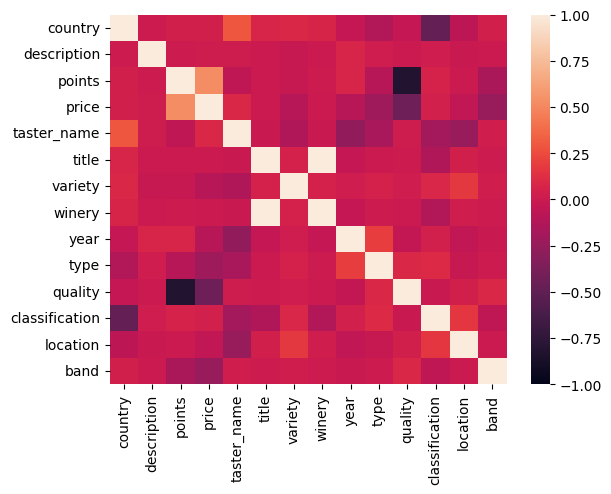

In [57]:
#make all columns categorical
selected_wine_data = pd.DataFrame({col: wine_df.dropna()[col].astype('category').cat.codes for col in wine_df.dropna()}, index=wine_df.dropna().index)

#create correlations and correlation heat map
corr= selected_wine_data.corr(method = 'pearson')
sns.heatmap(corr, vmin=-1, vmax=1)

<Axes: xlabel='price', ylabel='points'>

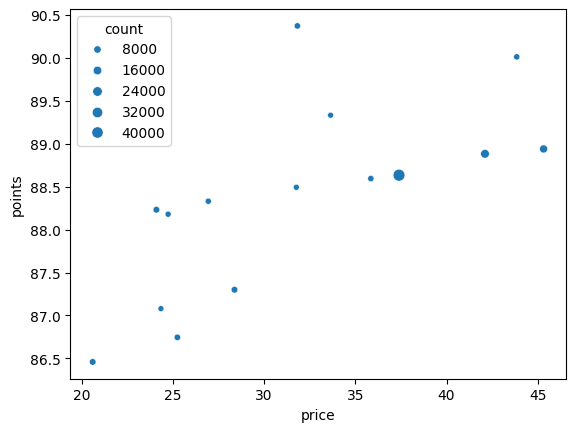

In [58]:
sns.scatterplot(by_country_stats.reset_index(), x='price', y='points', size='count')

In [59]:
top_5_countries = wine_df.country.value_counts().sort_values(ascending=False).iloc[:5].index.to_numpy()
top_5_countries

array(['US', 'France', 'Italy', 'Spain', 'Portugal'], dtype=object)

<Axes: xlabel='price', ylabel='points'>

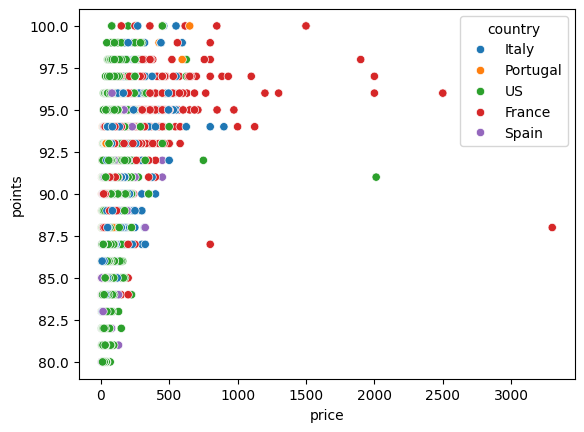

In [60]:
sns.scatterplot(wine_df[wine_df.country.isin(top_5_countries)], x='price', y='points', hue='country')

# Next
- [feature extraction](wine_review-feature_extraction.ipynb)